# Assignment 2
**COMP 4107 Fall 2017**

**Basim Ramadhan 100 901 646**

**Christian Abbott 100 863 049**

***

# NOTE: in our plots, the x-axis label should read "epoch" instead of "fold number". In each training epoch, we are using the entire training set using k-fold cross validation.

## Performing K-fold Cross Correlation

In our training process we used K-fold cross correlation to validate our the accuracy of our classifier, ensuring we don't have significant generalization errors. It also helped us ensure we are not underfitting or overfitting. The following code demonstrates that we used K-fold cross correlation during training.

In each epoch, we use a different subset of training data to validate our classifier's output. The MNIST training set contains 60000 elements. Assuming we do 600-fold cross validation and we run 600 epochs: in the first epoch, we use the first 100 elements of the training set for validation, and the remaining 59700 elements to train. In the second epoch, we use the second subset of 100 elements for validation, and the remaining 59700 elements to train. And so on until we've used all 600 subsets of 100 elements as validation in 600 epochs.

In [ ]:
num_folds = int(num_training_examples / net.batch_size)
print("Performing {}-fold cross validation while training on the 60,000 element train set".format(num_folds))

train_error = []
test_error = []
cv_error = []

for k in range(num_folds):
    # Deep copy the training set because we want to manipulate it
    x = np.copy(train_x)
    y = np.copy(train_y).reshape(1, 60000)
    y_oh = np.copy(train_y_onehot)

    # Indices of the cross-validation (test) examples
    cv_start = net.batch_size * k
    cv_end = net.batch_size * (k + 1)

    # Get the cross-validation (test) examples
    cv_columns = [x for x in range(cv_start, cv_end)]
    cv_x = x[:, cv_columns]
    cv_y = y[:, cv_columns]
    cv_y_oh = y_oh[:, cv_columns]

    # Remove cross-validation (test) examples from the training set
    x = np.delete(x, cv_columns, 1)
    y = np.delete(y, cv_columns, 1)
    y_oh = np.delete(y_oh, cv_columns, 1)

    # Shuffle the training examples for better results
    x, y, y_oh = net.shuffle_training_set(x, y, y_oh)

    training_batches = filter(lambda fold: fold != k, range(num_folds-1))
    for i in training_batches:
        batch_start = net.batch_size * i
        batch_end = net.batch_size * (i + 1)

        x_batch = np.array([row[batch_start:batch_end] for row in x])
        y_batch = np.array([row[batch_start:batch_end] for row in y_oh])

        a, o = net._propagate(x_batch)
        d = net._backpropagate(y_batch)
        net._adjust_weights()
        net._adjust_biases()

## Using Weight Decay for Regularization

We added a hyperparameter called weight_decay which we used to regularize our weights. The following code demonstrates that we used weight decay when updating our network's weights.

In [ ]:
for weight, delta, activation in zip(self._w, self._d, self._a):
    regularization = (learn_rate * self.weight_decay) * weight
    new_w = weight - learn_rate * np.dot(delta, activation.T) - regularization
    new_weights.append(new_w)

The following code shows how we used the weight decay hyperparameter again when updating our network's biases:

In [ ]:
for bias, delta in zip(self._b, self._d):
    regularization = (learn_rate * self.weight_decay) * bias
    new_b = bias - learn_rate * (np.sum(delta, axis=1)).reshape(bias.shape) - regularization
    new_biases.append(new_b)

## Investigating Performance for Different Numbers of Hidden Layers

For each of the following experiements, we used:
* Learning Rate: **0.005**
* Weight Decay: **0.2**
* Number of folds: **100**
* Samples per fold: **600**

### Zero Hidden Layers

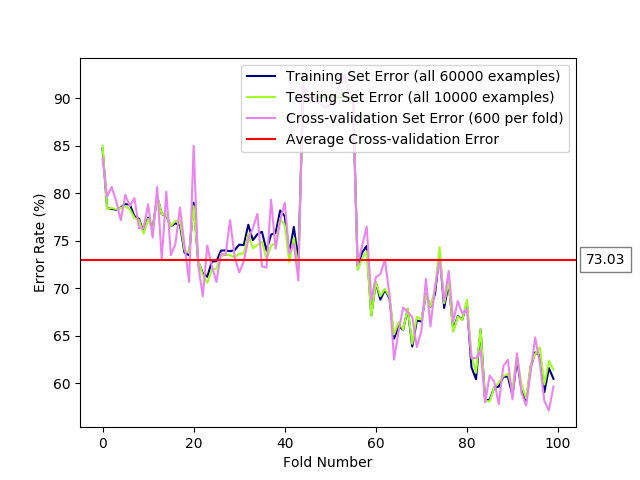

#### Architecture
* Input layer: 784
* Output Layer: 10

100-fold cross validation error: **73.03%** 

First, we tried training a network with no hidden layers. The poor performance indicates that the problem is difficult enough to require at least one hidden layer.

### One Hidden Layer

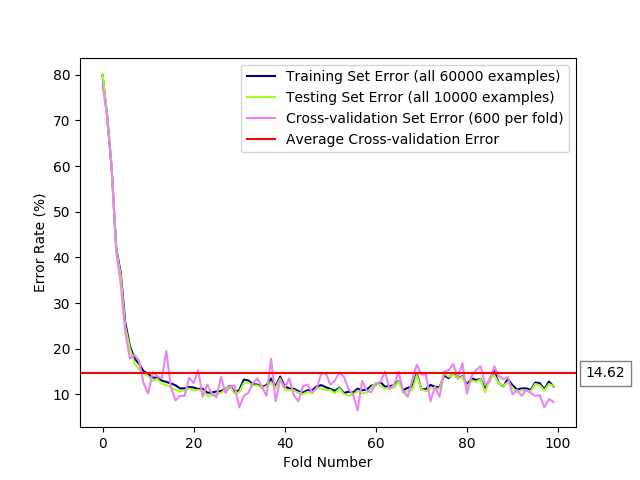

#### Architecture
* Input layer: 784
* Hidden Layer: 60
* Output Layer: 10

#### Result
100-fold cross validation error: **14.62%**

It looks like the classifier works reasonably well even with only one hidden layer. Let's keep adding layers to see how it affects accuracy.

### Two Hidden Layers

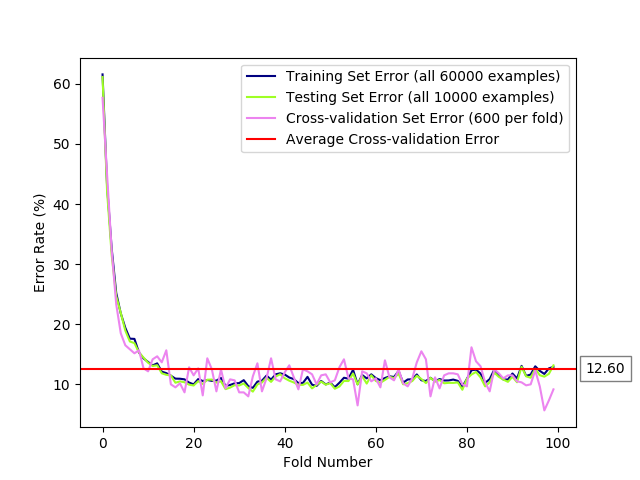

#### Architecture
* Input layer: 784
* Hidden Layer 1: 60
* Hidden Layer 2: 30
* Output Layer: 10

#### Result
100-fold cross validation error: **12.60%**

Adding a second layer helps a little bit without slowing down training very much.

### Three Hidden Layers

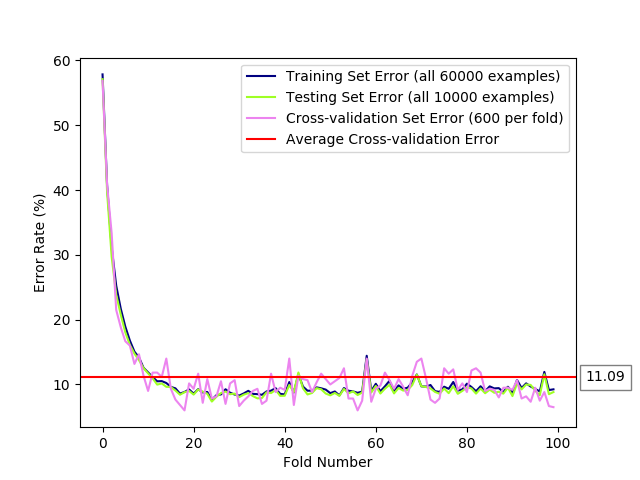

#### Architecture
* Input layer: 784
* Hidden Layer 1: 120
* Hidden Layer 2: 60
* Hidden Layer 3: 30
* Output Layer: 10

#### Result
100-fold cross validation error: **11.09%**

The third layer didn't help as much as adding the second layer did. Perhaps a third is unnecesary.

### Four Hidden Layers

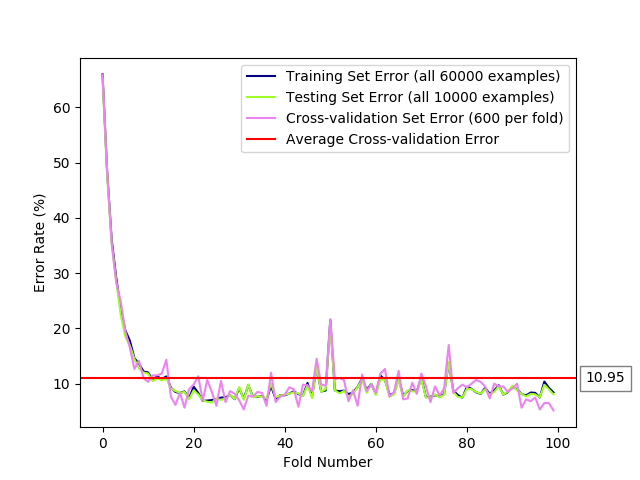

#### Architecture
* Input layer: 784
* Hidden Layer 1: 240
* Hidden Layer 2: 120
* Hidden Layer 3: 60
* Hidden Layer 4: 30
* Output Layer: 10

#### Result
100-fold cross validation error: **10.95%**

Again, the additional layer helped a little bit, but with each new layer, training time becomes longer.

### Conclusions

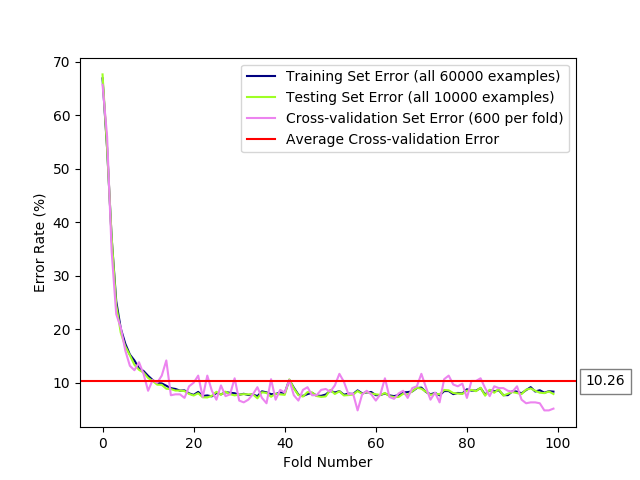

#### Architecture
* Input layer: 784
* Hidden Layer 1: 160
* Hidden Layer 2: 60
* Output Layer: 10

#### Result
100-fold cross validation error: **10.26%**

After some experimentation, we settled on two hidden layers. It provided a good balance between accuracy and training speed. Now we'll try experimenting with the sizes of those two hidden layers to improve the accuracy of the classifier.

## Investigating Performance for Different Sizes of Hidden Layers

### Small Layers

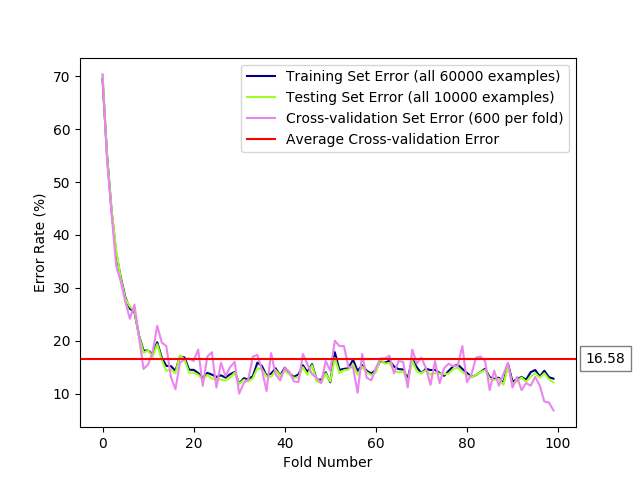

#### Architecture
* Input layer: 784
* Hidden Layer 1: 30
* Hidden Layer 2: 15
* Output Layer: 10

#### Result
100-fold cross validation error: **16.58%**

Making the layers very small doesn't give an awful classifier, but we can easily improve this.

### Medium Layers

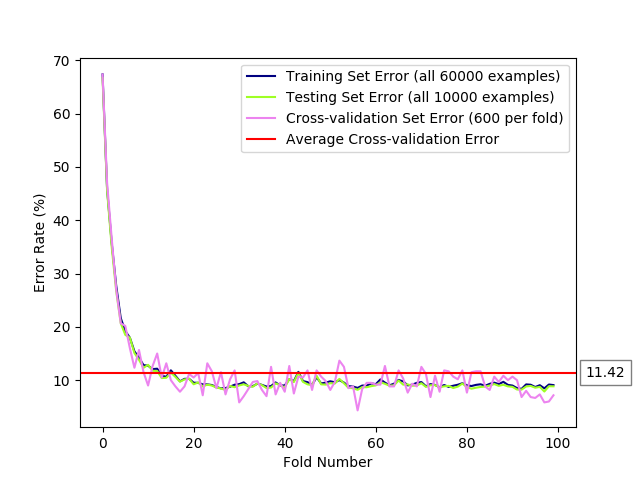

#### Architecture
* Input layer: 784
* Hidden Layer 1: 100
* Hidden Layer 2: 50
* Output Layer: 10

#### Result
100-fold cross validation error: **11.42%**

Making the layer bigger helped.

### Large Layers

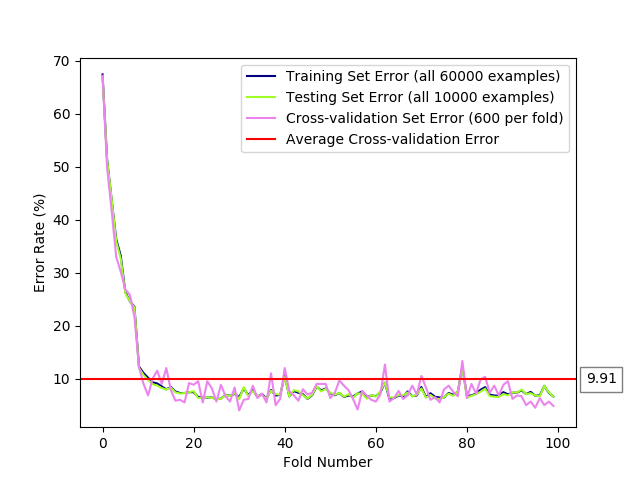

#### Architecture
* Input layer: 784
* Hidden Layer 1: 300
* Hidden Layer 2: 100
* Output Layer: 10

#### Result
100-fold cross validation error: **9.91%**

Making them even bigger helped even more.

### Very Large Layers

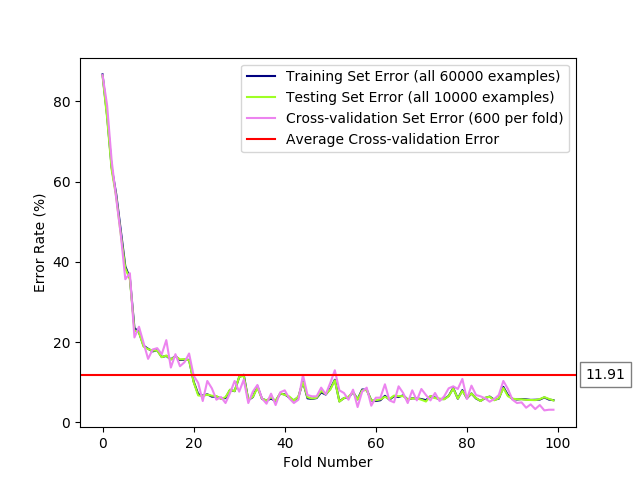

#### Architecture
* Input layer: 784
* Hidden Layer 1: 500
* Hidden Layer 2: 200
* Output Layer: 10

#### Result
100-fold cross validation error: **11.91%**

Making them too big has done the reverse. Let's make the layers smaller and try to find a good ratio between the two layers.

### Larger Same Size Layers

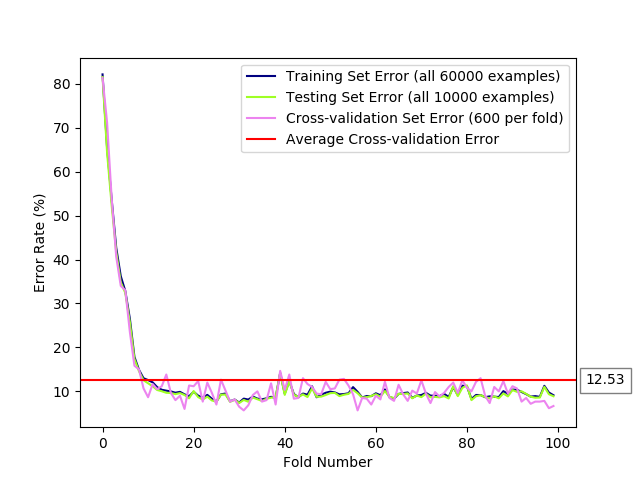

#### Architecture
* Input layer: 784
* Hidden Layer 1: 128
* Hidden Layer 2: 128
* Output Layer: 10

#### Result
100-fold cross validation error: **12.54%**

We tried using the same size for both hidden layer, but it didn't improve accuracy. Perhaps making both of them smaller would help.

### Smaller Same Size Layers

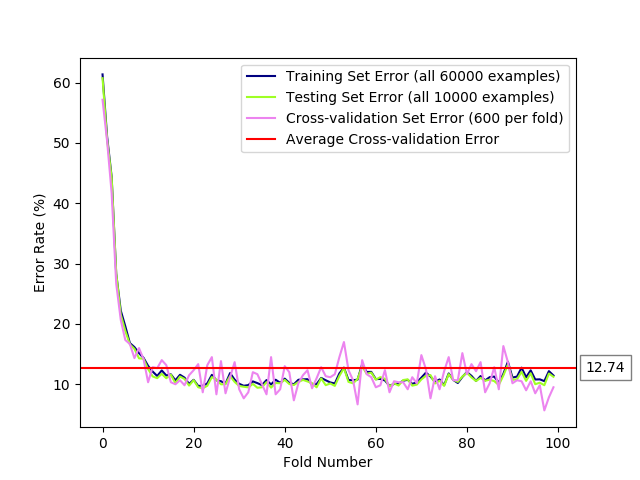

#### Architecture:
* Input layer: 784
* Hidden Layer 1: 64
* Hidden Layer 2: 64
* Output Layer: 10

#### Result
100-fold cross validation error: **12.74%**

We got a very similar result to using 128 for both hidden layers. Perhaps a wide difference between hidden layers would help.

### Layers With Wide Size Difference

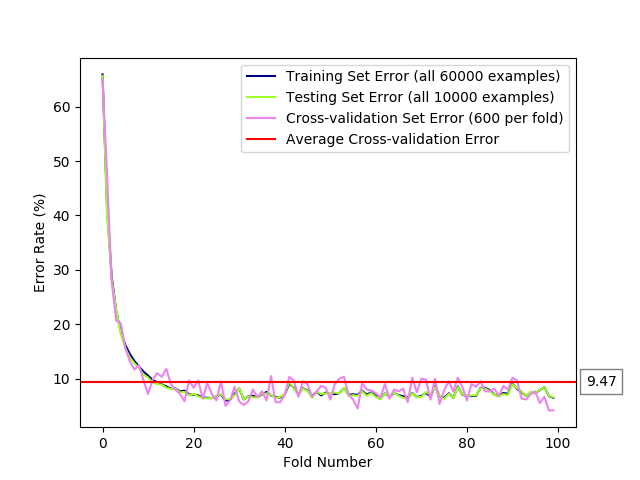

#### Architecture
* Input layer: 784
* Hidden Layer 1: 300
* Hidden Layer 2: 40
* Output Layer: 10

#### Result
100-fold cross validation error: **9.47%**

It looks like a wide difference between the two layers helps the classifier perform better, but not better than we've perviously seen.

### Conclusions

We learned a few things here:
* if the final hidden layer is too big, accuracy goes down
* layers should not be too small
* layers should not be too big
* layers should not be the same size
* layers should have sizeable size differences between them

## Final Results + Our Best Performance + Statistical Analysis

In this run, we had the following errors:
* error when testing with the 10,000 element test dataset: **4.18%**
* average cross-validation error over 300 folds: **6.65%**
* average cross-validation error over final 30 folds: **2.67%**

We use the following hyperparameters to achieve this: 
* MLP Architecture: 784, 160, 60, 10
* Learning rate: 0.001
* Weight Decay: 0.2
* Batch Size: 200
* Epochs: 300

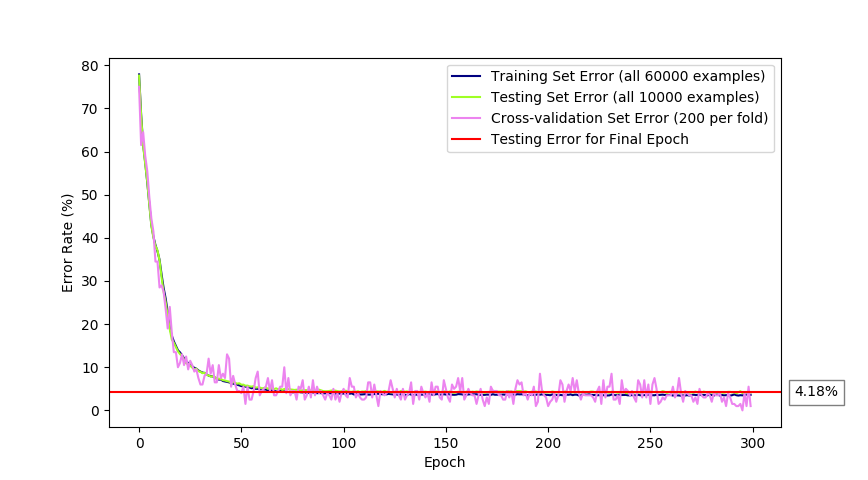

### Mean Classification Accuracy

##### For the mean classification error rate using the 10000 element test set
We computed a **95%** confidence interval for the test error of the classifier after the final epoch. This value is the error rate when using the **10,000 element testing set**. We used the following code to compute the confidence interval. The code is part of our submitted program; it runs after every time training is complete and prints out the interval.

In [ ]:
confidence = 0.95
samples = test_error[-int(epochs/10):-1]  # test set classification errors from last 10% of epochs
mean = np.mean(samples)
sigma = np.std(samples)
interval = stats.norm.interval(confidence, loc=mean, scale=sigma)

Let $X$ be a **random variable** representing the test error rate of the classifier. We used the test error rate for the a portion of epochs' test error rates---when the classifier has converged---as samples to construct the **probability distribution** for X. We did this to avoid the misleading values at the first few epochs. This does not damage our results; it simply makes the interval slightly larger. Considering the probability distribution, we are **95% confident** that the mean lies within the interval **(3.99%, 4.40%)**.

##### For the mean cross-validation error rate over 300 folds
Using the **same code** and **same approach** as the subsection above, we computed the **95%** confidence interval for the mean cross-validation error over 300 folds. We are 95% confident that the mean lies in the interval **(-12.08%, 25.38%)**

##### For the mean cross-validation error rate over the final 30 folds
Since the above interval considers the values from the first few epochs, we will use values from after the weights have converged. Using the **same code** and **same approach** as the subsection above, we computed the **95%** confidence interval for the mean cross-validation error over 30 folds. We are 95% confident that the mean lies in the interval **(3.30%, 5.30%)**

## References
The work we provided in our submission is our own.

We referred to the following sources for simple matters like tweaking hyperparameters and choosing layer sizes. The professor stated in the forums that this is allowed: https://culearn.carleton.ca/moodle/mod/forum/discuss.php?d=296418

* https://stats.stackexchange.com/questions/29130/difference-between-neural-net-weight-decay-and-learning-rate
* https://github.com/andrewdyates/Radial-Basis-Function-Neural-Network
* https://florianmuellerklein.github.io/nn/
* https://github.com/FlorianMuellerklein/Machine-Learning/blob/master/MultiLayerPerceptron.py
* https://github.com/hdmetor/NeuralNetwork
* https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/
* https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
* https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/